# Numerical Solution of the growth in time of a longitudinal crack 

Using the data from the paper (Jiang et al., 2017) [Paper 83]

* N = 14	day

* C = 2.2E-12	m/cycle

* dP= Pmax - Pmin = 0.52-0.39 = 0.13	Pa

* m=6.4	

* D=0.5	m

* t=0.015	m

* lcritical = 0.3 m


500 mm diameter spun CI pipe
installed in 1961
failed totally the 10 august 2013
nominal thickness of 15 mm
longitudinal barrel fracture
Cd 0.67
crack length inserted in the bell 175mm
pressure changes 390 to 520 kPa
14 events per day
predicted crack growth over 51 years (outside the bell and starting at 180mm)


critical crack calculated conservatively as 300 mm
unstable crack growth expected after 250 mm


during the stable growth the flow  was calculated as less than 0.03 L/s


In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import pandas as pd
import numpy as np
import matplotlib.cm as cmlib
from matplotlib.ticker import AutoMinorLocator, MultipleLocator


#universal constants
g=9.807 #m/s²
ro= 900 #kg/m³

#criteria for the output
detectableFlow = 0.250/3600 #m3/s

#delta time of one day 
deltaT = 1

AC ='AC'
PE = 'PE'
PVC = 'PVC'
IRON='Iron'

MATERIALS_PREDOMI = [AC,PVC,IRON,PE]

mpl.rcParams.update({'font.size':14, 'xtick.labelsize':14, 'ytick.labelsize':14,'axes.labelsize':14,
                     'legend.facecolor':'white'}) 


# for ppt
#mpl.rcParams.update({'font.size': 22,'text.color':'white','axes.labelcolor':'white','xtick.color': 'white', 'ytick.color': 'white',
 #               'axes.edgecolor': 'white','axes.linewidth':3,'grid.color':'white','legend.framealpha': 0 })

C:\Users\lllov\AppData\Local\Temp\ipykernel_19308\4240434731.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


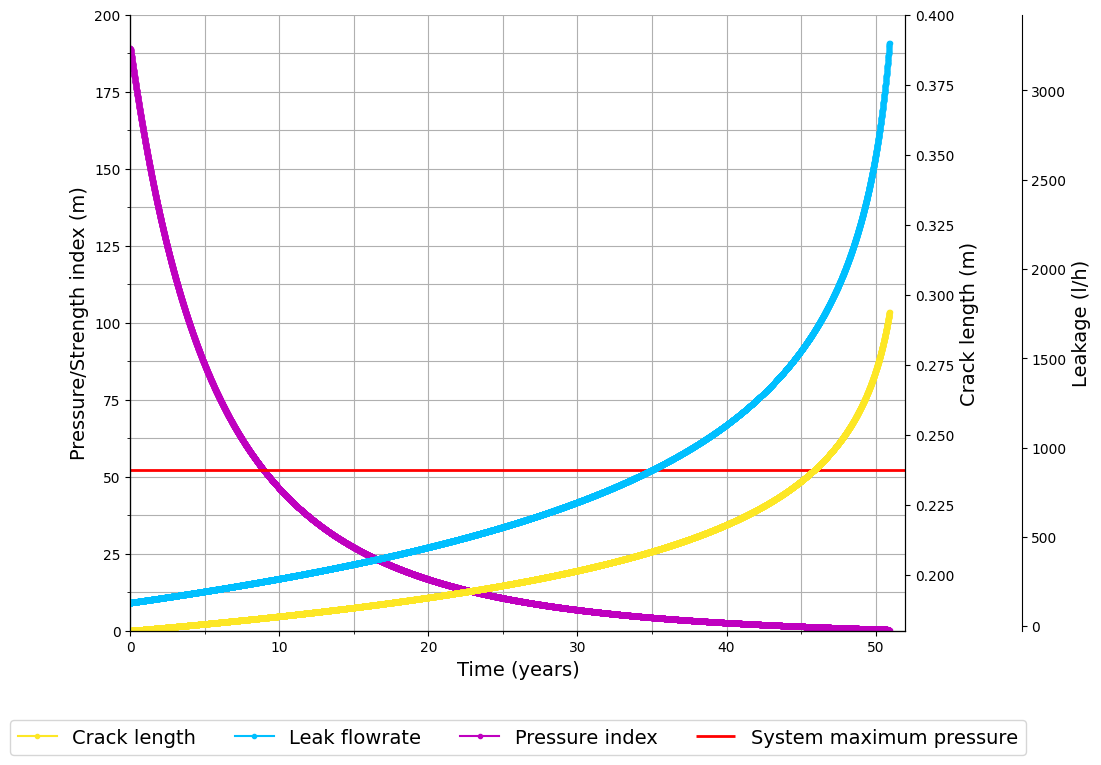

: 

In [6]:
import crackGrowthCalculations as cc
import crackGrowthGraphs as cg

width = 0.00017 #m
cd = 0.67 
ElasticityModulus = 108500000000 #Pa
Cparis = 2.2*(10**(-12)) #m/cycle/(Mpa m^0.5)^m
Mparis =6.4
thickness = 0.0138 #m
Diameter = 0.5 #m #Internal
initialLength = 0.18 #m
nCyclesPerDay = 14 

Pmax = 52 #m
Pmin = 39 #m
lengthNotLeaking = 0.175 #m

critical,days,hds,cls,Qs = cc.createCurveUntilDetectable(width,cd,ElasticityModulus,Cparis,Mparis,thickness,Diameter,initialLength,nCyclesPerDay,Pmax,Pmin,lengthNotLeaking)

QLph = [q*3600000 for q in Qs]

cg.graphsAllGrowth("NewExample",days,hds,cls,QLph,Pmax)



In [2]:
#density of water and gravity have to be predefined
def getMLongFAVAD(lf,Dint,E,t):
    
    return (2.93157*(Dint**0.3379)*(lf**4.8)*(10**(0.5997*(math.log(lf,10)**2)))*ro*g)/(E*(t**1.746))
           
def convertmToMPa(pressureInm):
    
    return pressureInm * ro * g / (10 ** 6)

def convertMPaTom(pressureInMPa):
    
    return pressureInMPa * (10 ** 6)/(ro * g)


#favad solve for h
#Cd, mFavad, area of the leak, flow at which is discoverable
def getPressureToBeDiscover(Cd, m, a, Q):
    
    C =  Cd*((2*g)**0.5) 

    a3 = a**3

    B3 = (2**(1/3)) * (C**2)
    
    B = ((2*a3*(C**6)*(m**3))+(3*(((12*a3*(C**10)*(m**7)*(Q**2))+(81*(C**8)*(m**8)*(Q**4)))**0.5))+(27*(C**4)*(m**4)*(Q**2)))**(1/3)

    B1 = B3 * (m**2)

    B2 = B3 * (a**2)

    hd = (1/3)*( (B/B1) + (B2/B) - (2*a/m) )
    
    return hd


In [5]:
def createSensivilityRanges():
    
    #FAVAD constants (min, typical, max, name)
    widths = [0.00001, 0.001, 0.05, "widthC"]# m  (min from paper 012)
    Cds = [0.5, 0.65, 0.8, "Cd"] #dimensionless (from paper 007)

    EModulus = [300000000, 1000000000, 207000000000, "E"] #GPa (from excel material properties)
    CsParis = [10**-13, 2.2*10**(-12), 10**-3, "Cparis"] # (aprox from equation and Book C001)
    msParis = [2, 6.4, 9, "mParis"] # (aprox from equation and Book C001)

    thicks = [0.0003, 0.011, 0.015, "thickness"] #m (from paper 012, 001, 98)
    Dsint = [0.010, 0.1, 0.9, "Dint"]#m (aprox from data wPipesGISNfailures[['NOM_DIA_MM']])

    crackLenghs= [0.020, 0.1, 0.300, "cLenght"] #m (assumtion)

    Ncycles= [1, 2, 14, "N"] #cycle per day (assumption)
    PressuresMin = [0, 20 , 100, "PMin"] #mca
    PressuresMax = [100, 150 ,400, "PMax"] #mca

    #list of variable variables
    iterables = [widths,Cds,EModulus,CsParis,msParis,thicks,Dsint,crackLenghs,Ncycles,PressuresMax,PressuresMin]
                
    return iterables


# Standard Values 
def getCurrentValsDict(widthC,Cd,E,Cparis,mParis,thickness,Dint,cLenght,N,Pmax,Pmin):
    
    currentVals = { "widthC": widthC, #m
                   "Cd": Cd, #dimensionless
                   "E": E, # 
                   "Cparis": Cparis,
                   "mParis": mParis,
                   "thickness": thickness, #m
                   "Dint": Dint, #m
                   "cLenght" : cLenght,
                   "N" : N,
                   "PMax" : Pmax,
                   "PMin" : Pmin
        }
    
    return currentVals


In [3]:
def removeTopRightFrame(ax):
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    return ax

## START NEW ---------------

In [4]:
#Uses Pmax for the flow (i.e. minimum night flow)
# Pressures in meters column of water
def createCurveUntilDetectable(widthC,Cd,E,Cparis,Mparis,t,Dint,lo,nCicles,Pmax,Pmin,reducing):

    #initialization 
    li = lo
    Timef = 0
    D= Dint
    critical = False
    times = []
    Hdetect = []
    
    leng=[]
    area=[]
    flow=[]
    
    detectable = False
    
    #gets the pressure and pressure difference in the necessary units for TADA and FAVAD eq
    deltaP= convertmToMPa(Pmax-Pmin)

    #Euler
    while not detectable:

        #Paris Law------------------------------------------------------------------

        #calculation of the geometric factor (from Tada)
        lam = li/(D*t/2)**0.5
        if lam <= 1:
            Y = (1+1.25* lam**2)**0.5   
        elif lam <= 5:
            Y = 0.6 + (0.9 * lam)
        else:
            critical = True
            break
              
        #calculation of delta K
        deltaK = deltaP * D / (2*t) * Y * (math.pi * li)**0.5

        #Final lenght of the crack
        nCiclesPerIter = deltaT * nCicles
        lf = (Cparis * deltaK**Mparis )* nCiclesPerIter + li

        
        # FAVAD--- from paper 012---------------------------------------------------
        leakArea = lf*widthC
        mFAVAD = getMLongFAVAD(lf*2,Dint,E,t)
        Q = Cd*((2*g)**0.5)*(leakArea*(Pmax**0.5)+mFAVAD*(Pmax**1.5))
            
        try:
            hd = getPressureToBeDiscover(Cd, mFAVAD, leakArea, detectableFlow)
        except:
            print("Flow that is produced at the Pmax: ",Q)
            hd = 0 if (Q>=detectableFlow) else Exception("Error")
        
        detectable = True if (hd<=Pmax) else False

        Hdetect.append(hd)
        times.append(Timef)
        leng.append(lf)
        area.append(leakArea)
        flow.append(Q)
   
        
        li = lf
        Timef += deltaT
        
        if ((Timef/365)==30) & reducing:
            deltaP= convertmToMPa(Pmax-Pmin-5)

            
        elif (Timef/365)>200:
            print("Too Slow")
            break
    
    
    return critical, times, Hdetect, leng, area, flow

In [8]:
def graphGrowth(labY,listTimes,listVals,listLabel):
    
    colors = [ cmlib.get_cmap('viridis')(x) for x in np.linspace(0, 1, len(listTimes))]

    fig, ax = plt.subplots(figsize=(10, 6))

    for t,hds,l,c in zip(listTimes,listVals,listLabel,colors):

        timesY = [x / 365 for x in t]

        ax.plot(timesY,hds,label=l,marker=".",color=c)  


    title = ('Pipe D='+ str(diam) + ' t=' + str(thickness) + ' E=' + str(E/1000000000) +
            "e6 with crack0 L=" + str(cLenght) + " w=" + str(widthC) )

    #ax.set_title(title,fontsize=16)
    ax.set_ylabel(labY,fontsize=14)
    ax.set_xlabel('Time (years)',fontsize=14)
    #ax.set_xlim(60,61)

    #ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4, fontsize=14)

    ax= removeTopRightFrame(ax)

    #fig.savefig('Maps_Graph/CrackGrowthAnalysis/'+'PipeVsHToBeDetected' +'.jpg', dpi=200, bbox_inches='tight')
    
    return ax



In [7]:
va = createSensivilityRanges()

v = 2 #Chooses the typical values in the sensitivity values 

#Typical diameter and thickess
#Smaller diameters "in theory" gives slower cracks growths
thickness = 0.01 #va[5][1]
diam = 0.15 #va[6][1]

#HighValues for the rest of values
N = va[8][v]
Cd = va[1][v]
E = va[2][v]
cPa = va[3][2]
mPa = va[4][2]
    
#crack lenght and width in m
cLenght= 0.001
widthC = 0.001

#From Auckland Data 70 and 150
PMaxAve= 70
PMaxMax= 150

#Fluctuation mean 7m and max 35m in Auckland
PminAve= 60 #10 fluct
PminMax = 140  #10 fluct
PminMaxFluctAve = 10 #60 fluct
PminMaxFluct = 90 #60 fluct

#Fluctuation 
Pmin = 120 #30 fluct
Pmin2 = 130 #20 fluct
Pmin3 = 110 #40 fluct

label1 = "Fluc:" + str(PMaxAve-PminAve) + " Pmax:" + str(PMaxAve)
critical, times, Hdetect, leng, area, flow = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,cLenght,N,
                                                     PMaxAve,PminAve,False)

label4 = "Fluc:" + str(PMaxAve-PminMaxFluctAve) + " Pmax:" + str(PMaxAve)
critical4, times4, Hdetect4, leng4, area4, flow4 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,cLenght,N,
                                                      PMaxAve,PminMaxFluctAve,False)

label2 = "Fluc:" + str(PMaxMax-PminMax) + " Pmax:" + str(PMaxMax)
critical2, times2, Hdetect2, leng2, area2, flow2 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,cLenght,N,
                                                      PMaxMax,PminMax,False)

label3 = "Fluc:" + str(PMaxMax-PminMaxFluct) + " Pmax:" + str(PMaxMax) 
critical3, times3, Hdetect3, leng3, area3, flow3 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,cLenght,N,
                                                      PMaxMax,PminMaxFluct,False)


Too Slow
Too Slow


# start again ---

In [4]:
def calculateArea(lami,Di,Pi,Ei,vPoi):
    
    if lami <= 1:
        Ya = lami**2 + 0.625*lami**4
    elif lami <= 5:
        Ya = 0.14 +0.36*lami**2 +0.72*lami**3 +0.405*lami**4
    
    E1 = E/(1-vPoi**2) 
    
    A = (math.pi * Di**2 * Pi * Ya)/(2*E1) 
    
    return A
    
    

In [8]:
def createCurveUntilDetectable(widthC,Cd,E,Cparis,Mparis,t,Dint,lo,nCicles,Pmax,Pmin,vPoiss,areaIni):

    #initialization 
    li = lo
    Timef = 0
    D= Dint
    critical = False
    times = []
    Hdetect = []
    
    leng=[]
    area=[]
    flow=[]
    Q=0
    #Area =areaIni
     
    #gets the pressure and pressure difference in the necessary units for TADA and FAVAD eq
    deltaP= convertmToMPa(Pmax-Pmin)
    #print(deltaP)

    
    #Euler
    while Q < (detectableFlow + 0.025):

        #Paris Law------------------------------------------------------------------

        #calculation of the geometric factor (from Tada)
        lam = li/(D*t/2)**0.5
        if lam <= 1:
            Y = (1+1.25* lam**2)**0.5   
        elif lam <= 5:
            Y = 0.6 + (0.9 * lam)
        else:
            critical = True
            break
        
        #calculation of the area
        #Areai= calculateArea(lam,D,deltaP,E,vPoiss)
        #Area =  Areai+Area 
        
        #calculation of delta K
        deltaK = deltaP * D / (2*t) * Y * (math.pi * li)**0.5
        
        #Final lenght of the crack
        nCiclesPerIter = deltaT * nCicles 
        lf = (Cparis * deltaK**Mparis )* nCiclesPerIter + li 
       
        # FAVAD--- from paper 012---------------------------------------------------
        lfL=lf-0.175
        leakArea = lfL*2*widthC
        try:
            mFAVAD = getMLongFAVAD(lfL*2,Dint,E,t)
        except:
            print(lfL,Dint,E,t)
            
        Q = Cd*((2*g)**0.5)*(leakArea*(Pmax**0.5)+mFAVAD*(Pmax**1.5))
        #Q = Cd*((2*g)**0.5)*(Area*(Pmax**0.5)+mFAVAD*(Pmax**1.5))
            
        try:
            hd = getPressureToBeDiscover(Cd, mFAVAD, leakArea, detectableFlow)
            #hd = getPressureToBeDiscover(Cd, mFAVAD, Area, detectableFlow)
        except:
            print("Flow that is produced at the Pmax: ",Q)
            hd = 0 if (Q>=detectableFlow) else Exception("Error")
        
        
        Hdetect.append(hd)
        times.append(Timef)
        leng.append(lf)
        #area.append(Areai)
        flow.append(Q)
   
        
        li = lf
        Timef += deltaT
    
            
        if (Timef/365)>200:
            print("Too Slow")
            break
    
    
    return critical, times, Hdetect, leng, area, flow

In [12]:
def graphsAllGrowth(times,Hdx,lengx,flowx):
    
    col = [ cmlib.get_cmap('viridis')(x) for x in np.linspace(0, 1, 3)]

    fig, ax = plt.subplots(1,figsize=(10, 8))
    ax2=ax.twinx()
    ax3=ax.twinx()
    
    ax3.spines['right'].set_position(("axes", 1.15))

    timesYear = [x / 365 for x in times]

    ax.plot(timesYear,Hdx,label="Pressure index",marker=".",color="m") 
    ax2.plot(timesYear,lengx,label="Crack length",marker=".",color= col[2])  
    ax3.plot(timesYear,flowx,label="Leak flowrate",marker=".",color='deepskyblue')  
    ax.hlines([52],0,100,label="System maximum pressure",linewidth=2,color='r')


    #title = ('Pipe D='+ str(diam) + ' t=' + str(thickness) + ' E=' + str(E/1000000000) +
     #       "e6 with crack0 L=" + str(cLenght) + " w=" + str(widthC) )

    #ax.set_title(title,fontsize=16)
    ax.set_ylabel("Pressure/Strength index (m)",fontsize=14)
    ax2.set_ylabel("Crack length (m)",fontsize=14)
    ax3.set_ylabel("Leakage (m3/s)",fontsize=14)
    ax3.set_ylabel("Leakage (l/h)",fontsize=14)
    ax.set_xlabel('Time (years)',fontsize=14)
    
    #For the zoom in 
    ax.set_xlim(0,52)
    ax.set_ylim(0,200)
    ax2.set_ylim(0.18,0.40)
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.grid(axis='both', which='both')
    
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()

    ax2.legend(lines2+lines3+lines,labels2+labels3+ labels,
               loc='upper center',bbox_to_anchor=(.5,-.13), ncol=4,  fontsize=14)
    
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax3.spines['top'].set_visible(False)

    #fig.savefig('Maps_Graph/CrackGrowthAnalysis/'+'ExampleGraphZOOM' +'.png',
           #     dpi=200, bbox_inches='tight',transparent=True)
    fig.savefig('ExampleGraphZOOM' +'.png',
                dpi=200, bbox_inches='tight',transparent=True)



C:\Users\lllov\AppData\Local\Temp\ipykernel_19308\3510417827.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col = [ cmlib.get_cmap('viridis')(x) for x in np.linspace(0, 1, 3)]


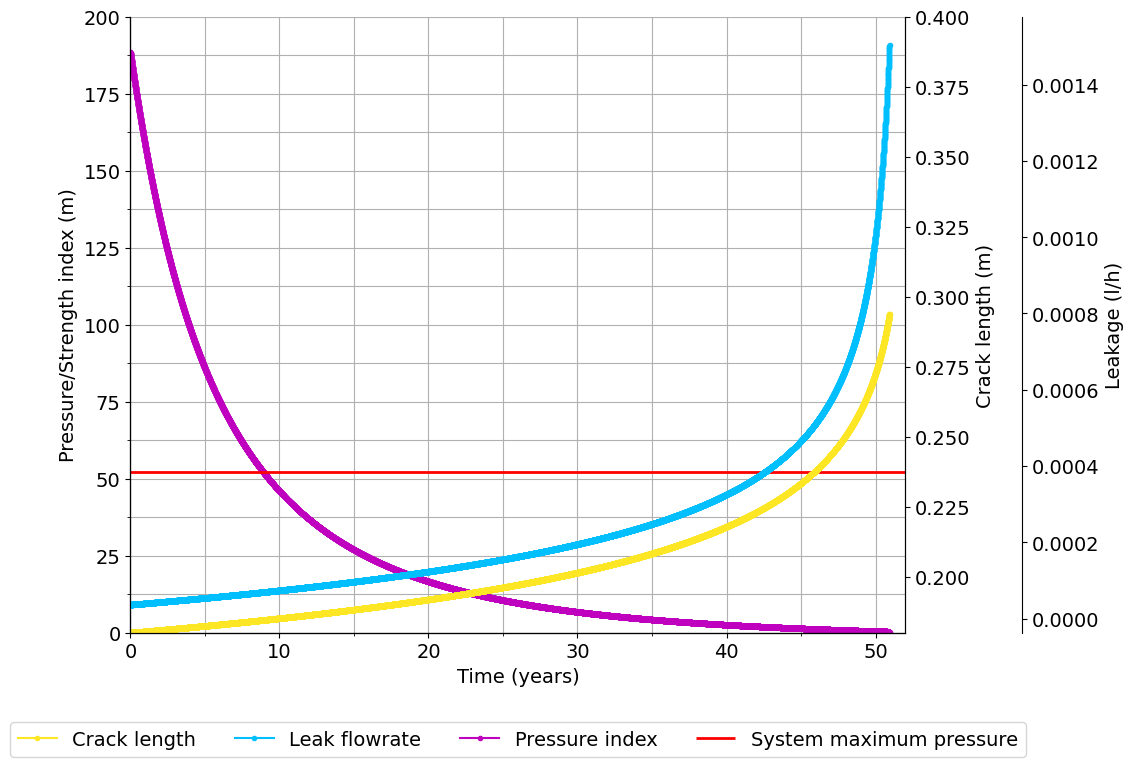

In [13]:
#vPoiss= 0.3
Cd= 0.67
E= 108500000000
cPa= 2.2*10**-12
mPa= 6.4
thickness= 0.0138 
diam= 0.5
cLenght= 0.18
N= 14
PmaxX= 52 #m
PminX= 39 #m
#AIni= cLenght * 0.00001
widthC =0.00017

#should uncommnet the -0.175 in the method
crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,PmaxX,PminX,0,0)
    
graphsAllGrowth(timx,Hdx, lengx, flowx)

C:\Users\lllov\AppData\Local\Temp\ipykernel_18248\346184699.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  col = [ cmlib.get_cmap('viridis')(x) for x in np.linspace(0, 1, 3)]


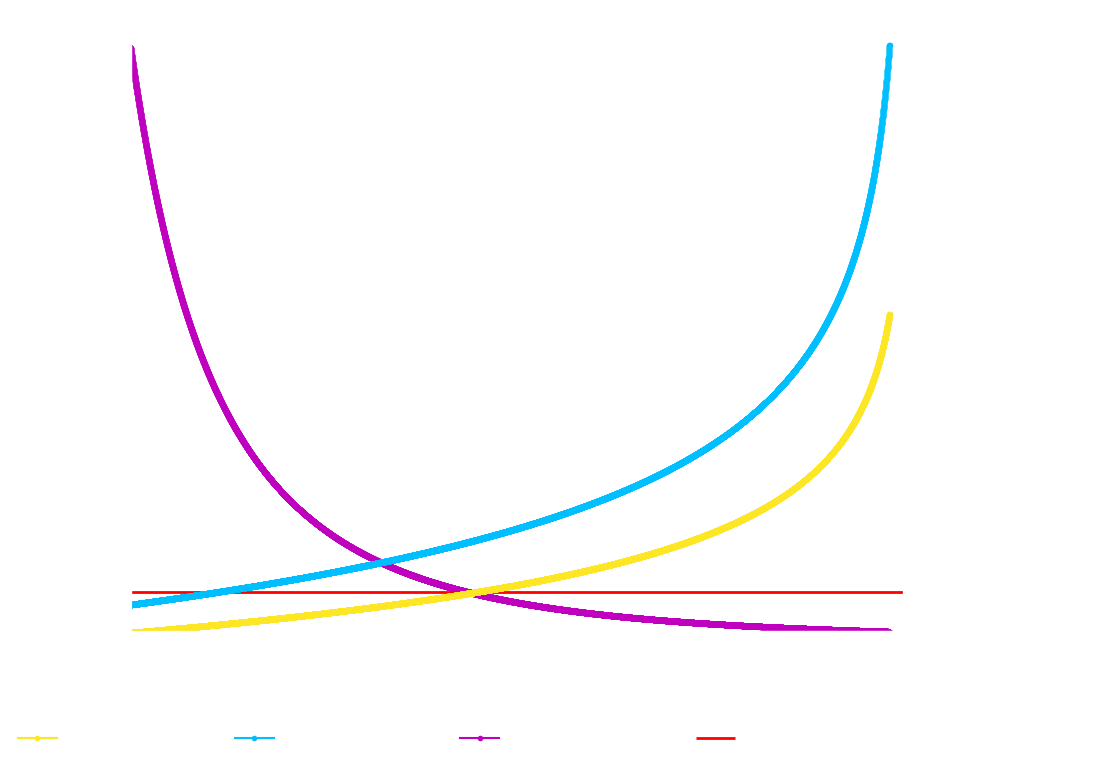

In [41]:
#vPoiss= 0.3
Cd= 0.67
E= 108500000000
cPa= 2.2*10**-12
mPa= 6.4
thickness= 0.0138 
diam= 0.5
cLenght= 0.18
N= 14
PmaxX= 52 #m
PminX= 39 #m
#AIni= cLenght * 0.00001
widthC =0.00017

#should uncommnet the -0.175 in the method
crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,PmaxX,PminX,0,0)

flowxlph= [element * 3600000 for element in flowx]   #m3/s to l/h
    
graphsAllGrowth(timx,Hdx, lengx, flowxlph)

# Sensitivity analysis ---------------------------------------------------------

In [356]:
def graphSensitivityGrowth(listTimes,listHds,labels,PmaxX,vari):
    
    pallet='plasma'

    title = "Variation of " + vari + "\n"
        
    if vari=="pressure fluctuation":
            
        title = title + ('D='+ str(diam) + 'm t=' + str(thickness) + 'm E=' + str(int(E/1000000000)) +
            "GPa Lc=" + str(cLenght) + "m wc=" + str(widthC) +"m" +  " N=" + str(N)   )
        name = 'PF'
            
    elif vari=="cycles":   
        title = title + ('D='+ str(diam) + 'm t=' + str(thickness) + 'm E=' + str(int(E/1000000000)) +
            "GPa Lc=" + str(cLenght) + "m wc=" + str(widthC) +"m" +  " Pmax-Pmin="+ str(PmaxX) +"m-"+ str(PminX) +"m")
        name = 'CY'
            
    elif vari=="wall thickness":
        pallet='plasma_r'
        title = title +  ('D='+ str(diam) + 'm E=' + str(int(E/1000000000)) + "GPa Lc=" + str(cLenght) + "m wc=" + str(widthC) +"m" + 
            " N=" + str(N) + " Pmax-Pmin="+ str(PmaxX) +"m-"+ str(PminX) +"m")
        name = 'WT'
            
    elif vari=="crack length":
        title = title +  ('D='+ str(diam) + 'm t=' + str(thickness) + 'm E=' + str(int(E/1000000000)) 
            + "GPa " + "wc=" + str(widthC) +"m" + " N=" + str(N) + " Pmax-Pmin="+ str(PmaxX) +"m-"+ str(PminX) +"m")
        name = 'CL'
            
    elif vari=="material":
    
        title = title + ('D='+ str(diam) + 'm ' + " Lc=" + str(cLenght) + "m wc=" + str(widthC) +"m" + 
            " N=" + str(N) +  " Pmax-Pmin="+ str(PmaxX) +"m-"+ str(PminX) +"m")
        name = 'MAT'
    
    
    colors =  COLMAT if vari == "material" else [cmlib.get_cmap(pallet)(x) for x in np.linspace(0, 1, len(listTimes))] 

    fig, ax = plt.subplots(1,figsize=(10, 8))
    
    for t,hds,l,c in zip(listTimes,listHds,labels,colors):

        timesY = [x / 365 for x in t]
        lw = 5 if vari =="material" else 2 
        ax.plot(timesY,hds,label=l,linewidth=lw, color=c)  
        

    ax.hlines([PmaxX],0,100,linewidth=2,color='r',label="Pmax")
    ax.set_ylabel("Strength index/Pressure (m)",fontsize=14)
    ax.set_xlabel('Time (years)',fontsize=14)
    ax.set_xlim(0,100)
    
    ax.legend(loc='upper center',bbox_to_anchor=(.5,-.13), ncol=6,  fontsize=14)
    
    ax.set_title(title,fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    

    fig.savefig('Maps_Graph/CrackGrowthAnalysis/'+'Sensi'+ name +'.jpg', dpi=200, bbox_inches='tight')
    


In [359]:
#Fix values
widthC= 0.0001    #S
Cd= 0.67
diam= 0.15 
PmaxX = 120
E= 170000000000  #S
cPa= 2.2*10**-12
mPa= 6.4

Too Slow
Too Slow
Too Slow


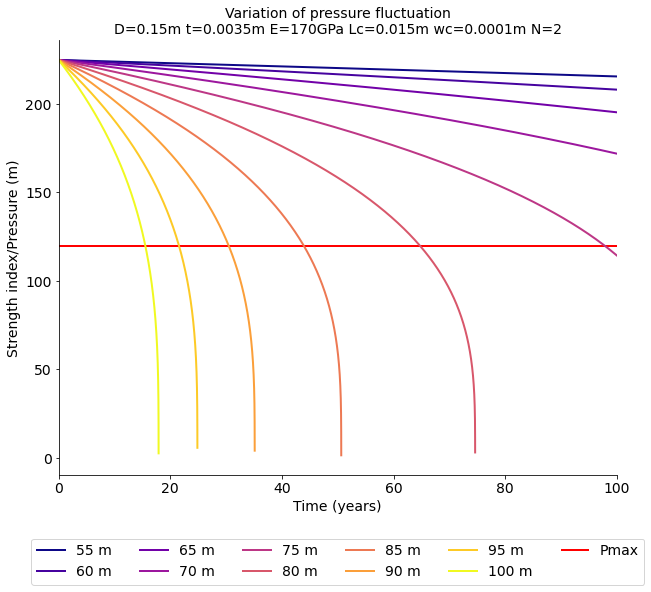

In [360]:
thickness= 0.0035 #S
cLenght= 0.015   #S
N= 2             #S

  
listT =[]
listH =[]
labels =[]

#150 is auckland
for pmin in np.arange(65, 15, -5).tolist():
    
    PminX = pmin
    fluct = PmaxX- PminX
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listH.append(Hdx)
    labels.append(str(fluct)+' m')
   #print(PminX)
    
graphSensitivityGrowth(listT,listH, labels,PmaxX,"pressure fluctuation")


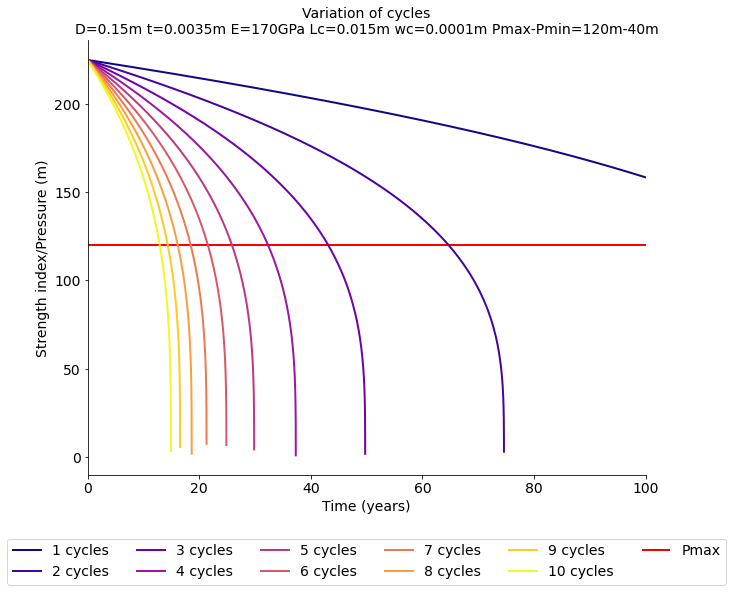

In [361]:
thickness= 0.0035 #S
cLenght= 0.015   #S
PminX= 40 #m

listT =[]
listH =[]
labels =[]
    
for ni in np.arange(1, 11, 1).tolist():
    
    N = ni
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listH.append(Hdx)
    labels.append(str(ni)+' cycles')
    


graphSensitivityGrowth(listT,listH, labels,PmaxX,"cycles")


Too Slow
Too Slow
Too Slow
Too Slow
Too Slow


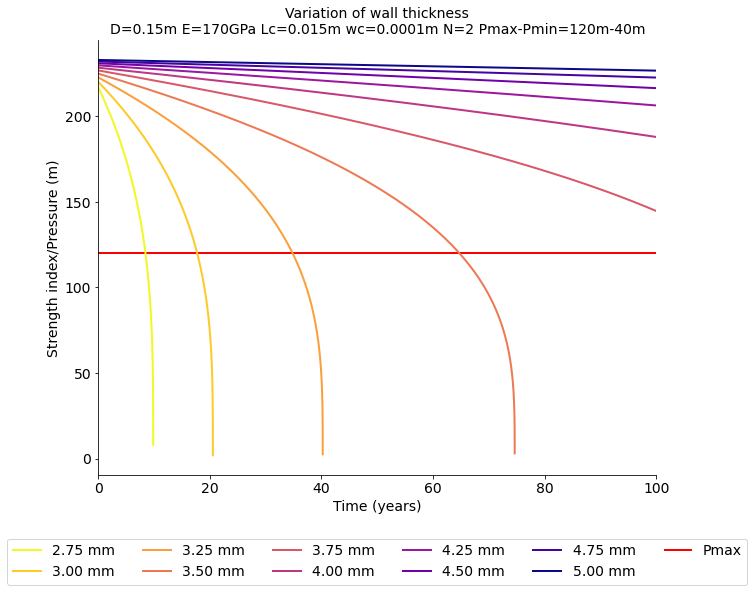

In [362]:
cLenght= 0.015   #S
PminX= 40#m
N = 2

listT =[]
listH =[]
labels =[]
    
for th in np.arange(0.00275, 0.00524, 0.00025).tolist():
    
    thickness = th
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listH.append(Hdx)
    labels.append("%.2f" % (th*1000)+' mm')
    


graphSensitivityGrowth(listT,listH, labels,PmaxX,"wall thickness")


Too Slow
Too Slow
Too Slow
Too Slow


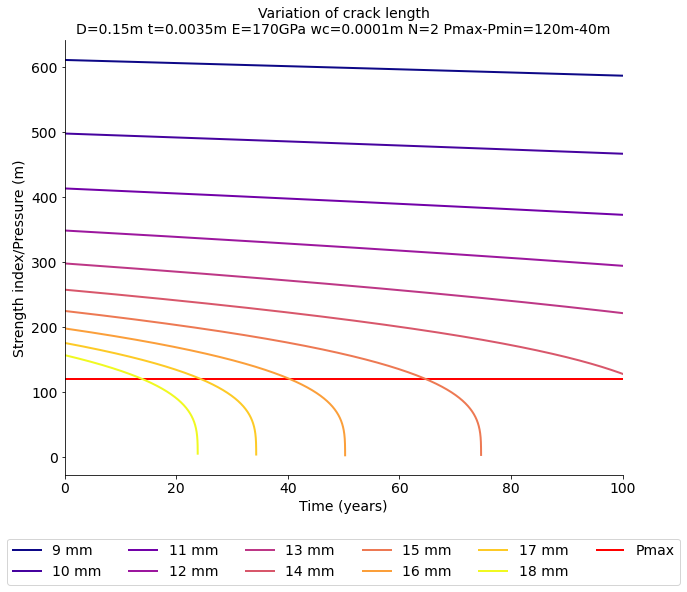

In [363]:
PminX= 40 #m
N = 2
thickness = 0.0035

listT =[]
listH =[]
labels =[]
    
for lg in np.arange(0.009, 0.019, 0.001).tolist():
    
    cLenght= lg
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listH.append(Hdx)
    labels.append("%.0f" % (lg*1000)+' mm')
    


graphSensitivityGrowth(listT,listH, labels,PmaxX,"crack length")

In [349]:
def getMaterialConst():
    
    fmaterialsConst='Data/Const-Materials.csv'

    materialsConst = pd.read_csv(fmaterialsConst, delimiter = ',', index_col=['MATERIAL'])
    
    return materialsConst

consCoM = getMaterialConst()['Color']
COLMAT=[consCoM[m] for m in [IRON,PVC,PE]]

Too Slow


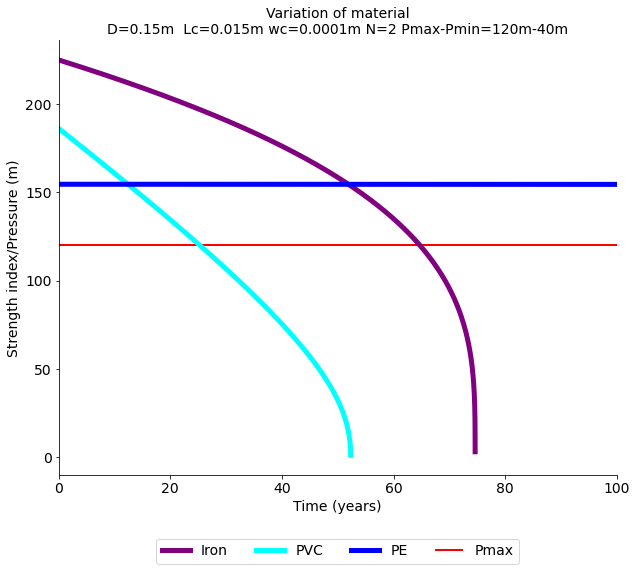

In [358]:
cLenght= 0.015
PminX= 40 #m auckland
N=2

listT =[]
listH =[]
labels =[]

#IRON, PVC, PE
thick = [0.0035,0.0148,0.0168]
Es = [170000000000,3200000000,1200000000]
cPas= [2.2*10**-12,2.7*10**-7,7.9*10**-10]
mPas= [6.4,4.5,9.6]
    
for m,thickness,E,cPa,mPa in zip([IRON,PVC,PE],thick,Es,cPas,mPas):
    
    
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listH.append(Hdx)
    labels.append(m)
    


graphSensitivityGrowth(listT,listH, labels,PmaxX,"material")

In [280]:
thickness= 0.0035 #S
cLenght= 0.02   #S
N= 2             #S
PmaxX= 125


  
listT =[]
listH =[]
labels =[]


for pmin,CP,MP in zip([ 62.5, 50, 37.5,25,12.5],
                        [ 2.1*10**-22, 8.5*10**-22, 7.5*10**-21, 1.75*10**-20, 2.5*10**-20],
                        [ 13.7, 13, 11.8, 11.2, 10.8]):
    
    PminX = pmin
    fluct = PmaxX- PminX
    cPa=CP
    mPa=MP
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listH.append(Hdx)
    labels.append(str(fluct)+'m')
    
graphSensitivityGrowth(listT,listH, labels,PmaxX)



TypeError: graphSensitivityGrowth() missing 1 required positional argument: 'vari'

# Change in pressure fluctuation at sometime -----------------------

In [6]:
va = createSensivilityRanges()

v = 2

#Typical diameter and thickess
#Smaller diameters "in theory" gives slower cracks growths
thickness = 0.01 #va[5][1]
diam = 0.15 #va[6][1]

#HighValues for the rest of values
N = va[8][v]
Cd = va[1][v]
E = va[2][v]
cPa = va[3][2]
mPa = va[4][2]
    
#crack lenght and width in m
cLenght= 0.001
widthC = 0.001

#From Auckland Data 70 and 150
PMaxAve= 70
PMaxMax= 150

#Fluctuation mean 7m and max 35m in Auckland
PminAve= 20 #50 fluct
PminMax = 100  #50 fluct
PminMaxFluctAve = 15 #55 fluct
PminMaxFluct = 95 #55 fluct

PmaxRef=va[9][2]
PminRef=va[10][2]
         

label1 = "Fluc:" + str(PMaxAve-PminAve) 
critical, times, Hdetect = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,cLenght,N,
                                                      PMaxAve,PminAve,False)


label4 = "Fluc:" + str(PMaxAve-PminMaxFluctAve)
critical4, times4, Hdetect4 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,
                                                         cLenght,N,PMaxAve,PminMaxFluctAve,False)

label2 = "Fluc:" + str(PMaxAve-PminAve) + " reducted to: "+ str(PMaxAve-PminAve-5)
critical2, times2, Hdetect2 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,
                                                         cLenght,N,PMaxAve,PminAve,True)

label3 = "Fluc:" + str(PMaxAve-PminMaxFluctAve)+ " reducted to: "+ str(PMaxAve-PminMaxFluctAve-5)
critical3, times3, Hdetect3 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,
                                                         cLenght,N,PMaxAve,PminMaxFluctAve,True)



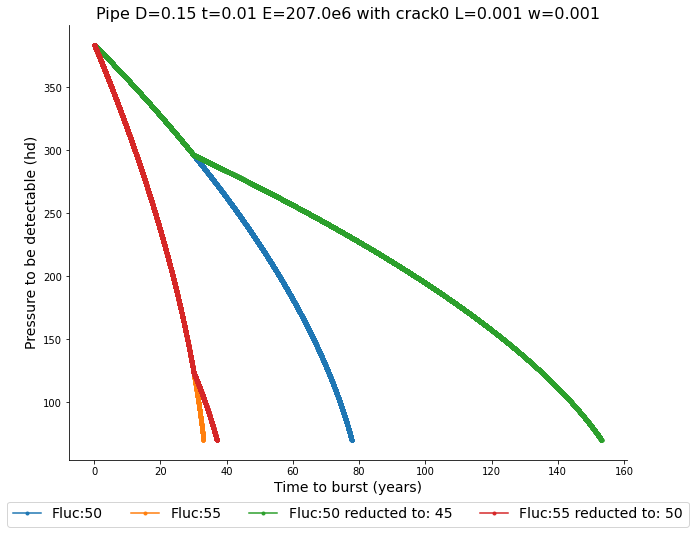

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))

for t,hds,l in zip([times,times4,times2,times3],[Hdetect,Hdetect4,Hdetect2,Hdetect3],[label1,label4,label2,label3]):
    
    timesY = [x / 365 for x in t]
    
    ax.plot(timesY,hds,label=l,marker=".")  


title = ('Pipe D='+ str(diam) + ' t=' + str(thickness) + ' E=' + str(E/1000000000) +
        "e6 with crack0 L=" + str(cLenght) + " w=" + str(widthC) )
    
ax.set_title(title,fontsize=16)
ax.set_ylabel('Pressure to be detectable (hd)',fontsize=14)
ax.set_xlabel('Time to burst (years)',fontsize=14)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4, fontsize=14)

ax= removeTopRightFrame(ax)

fig.savefig('Maps_Graph/CrackGrowthAnalysis/'+'PipeVsHToBeDetected' +'.jpg', dpi=200, bbox_inches='tight')




# Change of width------------------------------------------------------------

In [13]:
#Uses Pmax for the flow (i.e. minimum night flow)
# Pressures in meters column of water
def createCurveUntilDetectable(widthC,Cd,E,Cparis,Mparis,t,Dint,lo,nCicles,Pmax,Pmin,reducing):

    #initialization 
    li = lo
    Timef = 0
    D= Dint
    critical = False
    times = []
    Hdetect = []
    #mms=[]
    detectable = False
    
    
    #gets the pressure and pressure difference in the necessary units for TADA and FAVAD eq
    deltaP= convertmToMPa(Pmax-Pmin)

    #Euler
    while not detectable:

        #Paris Law------------------------------------------------------------------

        #calculation of the geometric factor (from Tada)
        lam = li/(D*t/2)**0.5
        if lam <= 1:
            Y = (1+1.25* lam**2)**0.5   
        elif lam <= 5:
            Y = 0.6 + (0.9 * lam)
        else:
            critical = True
            break
              
        #calculation of delta K
        deltaK = deltaP * D / (2*t) * Y * (math.pi * li)**0.5

        #Final lenght of the crack
        nCiclesPerIter = deltaT * nCicles
        lf = (Cparis * deltaK**Mparis )* nCiclesPerIter + li

        
        # FAVAD--- from paper 012---------------------------------------------------
        leakArea = lf*widthC
        print(leakArea)
        mFAVAD = getMLongFAVAD(lf,Dint,E,t)
            
        try:
            hd = getPressureToBeDiscover(Cd, mFAVAD, leakArea, detectableFlow)
        except:
            Q = Cd*((2*g)**0.5)*(leakArea*(Pmax**0.5)+mFAVAD*(Pmax**1.5))
            print("Flow that is produced at the Pmax: ",Q)
            hd = 0 if (Q>=detectableFlow) else Exception("Error")
        
        detectable = True if (hd<=Pmax) else False

        Hdetect.append(hd)
        times.append(Timef)
        #mms.append(mFAVAD)
        
        li = lf
        Timef += deltaT
        
        if reducing:
            widthC = widthC + (0.00000001 * nCicles)
        
        if (Timef/365)>200:
            print("Too Slow")
    
    return critical, times, Hdetect

In [32]:
va = createSensivilityRanges()

v = 2

#Typical diameter and thickess
#Smaller diameters "in theory" gives slower cracks growths
thickness = 0.01 #va[5][1]
diam = 0.15 #va[6][1]

#HighValues for the rest of values
N = va[8][v]
Cd = va[1][v]
E = va[2][v]
cPa = va[3][2]
mPa = va[4][2]
    
#crack lenght and width in m
cLenght= 0.001
widthC = 0.001

#From Auckland Data 70 and 150
PMaxAve= 70
PMaxMax= 150

#Fluctuation mean 7m and max 35m in Auckland
PminAve= 20 #50 fluct
PminMax = 100  #50 fluct
PminMaxFluctAve = 15 #55 fluct
PminMaxFluct = 95 #55 fluct

PmaxRef=va[9][2]
PminRef=va[10][2]
         

label1 = "Fluc:" + str(PMaxAve-PminAve) 
critical, times, Hdetect = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,cLenght,N,
                                                      PMaxAve,PminAve,0)

label4 = "Fluc:" + str(PMaxAve-PminMaxFluctAve)
critical4, times4, Hdetect4 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,
                                                         cLenght,N,PMaxAve,PminMaxFluctAve,0)

label2 = "Fluc:" + str(PMaxAve-PminAve) + "W+= 1e-7 per cycle"
critical2, times2, Hdetect2 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,
                                                         cLenght,N,PMaxAve,PminAve,0.00000001)

label3 = "Fluc:" + str(PMaxAve-PminMaxFluctAve)+ "W+= 1e-7 per cycle"
critical3, times3, Hdetect3 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,
                                                         cLenght,N,PMaxAve,PminMaxFluctAve,0.00000001)

label5 = "Fluc:" + str(PMaxAve-PminAve) + "W+= 1e-6 per cycle"
critical5, times5, Hdetect5 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,
                                                         cLenght,N,PMaxAve,PminAve,0.0000001)

label6 = "Fluc:" + str(PMaxAve-PminMaxFluctAve)+ "W+= 1e-6 per cycle"
critical6, times6, Hdetect6 = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,thickness,diam,
                                                         cLenght,N,PMaxAve,PminMaxFluctAve,0.0000001)



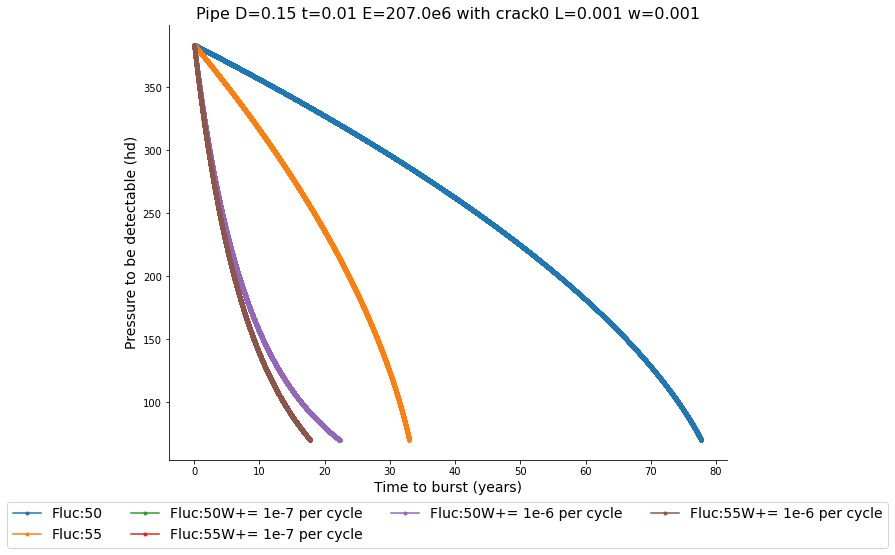

In [33]:
fig, ax = plt.subplots(figsize=(10, 8))

for t,hds,l in zip([times,times4,times2,times3,times5,times6],
                   [Hdetect,Hdetect4,Hdetect2,Hdetect3,Hdetect5,Hdetect6],
                   [label1,label4,label2,label3,label5,label6]):
    
    timesY = [x / 365 for x in t]
    
    ax.plot(timesY,hds,label=l,marker=".")  


title = ('Pipe D='+ str(diam) + ' t=' + str(thickness) + ' E=' + str(E/1000000000) +
        "e6 with crack0 L=" + str(cLenght) + " w=" + str(widthC) )
    
ax.set_title(title,fontsize=16)
ax.set_ylabel('Pressure to be detectable (hd)',fontsize=14)
ax.set_xlabel('Time to burst (years)',fontsize=14)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=4, fontsize=14)

ax= removeTopRightFrame(ax)

fig.savefig('Maps_Graph/CrackGrowthAnalysis/'+'PipeVsHToBeDeteChangingWitdh' +'.jpg', dpi=200, bbox_inches='tight')





## For Slides PPT ------------------------------------------------------------

In [78]:
Dint= 0.1 #mm
cd=0.65
E = 4000000000 #pa
t= 0.02 #m

widthC= 0.0001 #(0.1mm)

In [79]:
lf=0.03 #m (3 cm)

mF1 = getMLongFAVAD(lf,Dint,E,t)
leakArea = lf*widthC
getPressureToBeDiscover(cd, mF1, leakArea, detectableFlow)

56.52407615362123

In [80]:
lf= 0.06 #m (6 cm)

mF2 = getMLongFAVAD(lf,Dint,E,t)
leakArea = lf*widthC
getPressureToBeDiscover(cd, mF2, leakArea, detectableFlow)

13.952016162810157

# For diagram with failure rate change --------------------------------------

### material-slope-constant

AC 0.002965527484006485 0.1434445707205798

PVC 0.004237092769400808 -0.03494772802802236

Iron 0.0023674229561299756 0.03498147129129914

PE 0.005133173512483319 -0.1720469671361368

In [702]:
def graphManyFlowsGrowth(listTimes,listFlows,labels,CLeng):
    
    colors = [cmlib.get_cmap('autumn_r')(x) for x in np.linspace(0, 1, len(listTimes))]
    colorsL = [cmlib.get_cmap('viridis')(x) for x in np.linspace(0, 1, 3)]
    
    fig, ax = plt.subplots(1,figsize=(10, 8))
    
    ax2= ax.twinx()
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax2.spines['right'].set_position(("axes", 1.15))
    
    for t,Qs,l,c in zip(listTimes,listFlows,labels,colors):

        timesY = [x / 365 for x in t]
    
        if l == '2e-5 m':
            ax2.plot(timesY,Qs,label=l,linewidth=4, color=colorsL[2]) 
        else:
            ax2.plot(timesY,Qs,label=l,linewidth=2, color=c)  

    ax.plot(timesY,CLeng,label="Lc",linewidth=4, color=colorsL[1]) 
    
    ax2.set_ylabel("Flow rate (m3/s)",fontsize=14)
    ax.set_ylabel("Crack length (m)",fontsize=14)
    ax.set_xlabel('Time (years)',fontsize=14)
    ax2.set_xlim(0,58)
    ax2.set_ylim(0,0.000123)
   
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    ax2.legend(lines+lines2,labels+labels2,loc='upper center',bbox_to_anchor=(.5,-.13), ncol=6,  fontsize=14)
    
     
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['left'].set_visible(False)
    

    fig.savefig('Maps_Graph/CrackGrowthAnalysis/'+'DifferentFLow' +'.jpg', dpi=200, bbox_inches='tight')



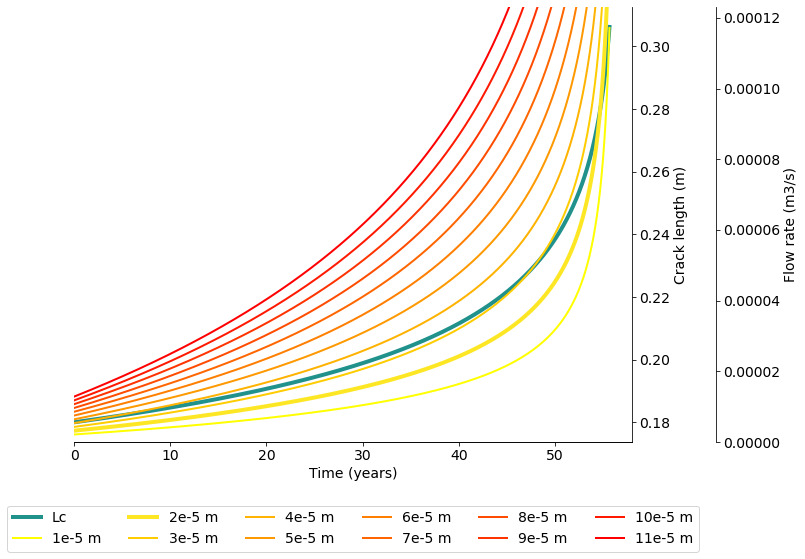

In [703]:
Cd= 0.67
E= 108500000000
cPa= 2.2*10**-12
mPa= 6.4
thickness= 0.015 
diam= 0.5
cLenght= 0.180
N= 14
PmaxX= 52 #m
PminX= 39 #m

listT =[]
listH =[]
labels =[]


for wc in np.arange(0.00001, 0.00012, 0.00001).tolist():
    
    widthC= wc
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listF.append(flowx)
    labels.append("%.0f" % (wc*100000)+'e-5 m')
    
graphManyFlowsGrowth(listT,listF, labels,lengx)

Too Slow
Too Slow
Too Slow


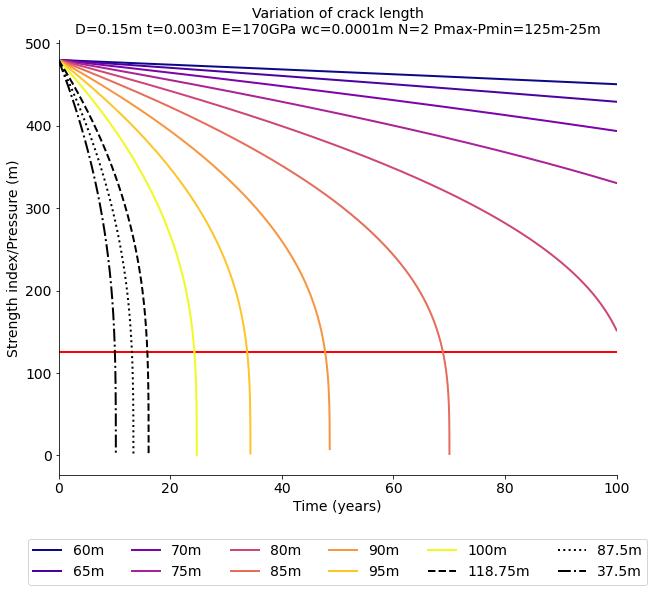

In [59]:
def graphSG(listTimes,listHds,labels,ax):
    
    
    for t,hds,l,ls in zip(listTimes,listHds,labels, ['--',':',"-."]):

        timesY = [x / 365 for x in t]

        ax.plot(timesY,hds,label=l,linewidth=2, color='k', linestyle=ls)  
        

    ax.legend(loc='upper center',bbox_to_anchor=(.5,-.13), ncol=6,  fontsize=14)
   
        

widthC= 0.0001    #S
Cd= 0.67
E= 170000000000  #S
thickness= 0.003 #S
diam= 0.15       #S
cLenght= 0.01   #S
N= 2             #S
PmaxX= 125
cPa= 2.2*10**-12
mPa= 6.4
  
listT =[]
listH =[]
labels =[]

for pmin in np.arange(65, 20, -5).tolist():
    
    PminX = pmin
    fluct = PmaxX- PminX
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listH.append(Hdx)
    labels.append(str(fluct)+'m')
    
ax=graphSensitivityGrowth(listT,listH, labels,PmaxX)

  
listT =[]
listH =[]
labels =[]


#150 is auckland
#for pmin,CP,MP in zip([ 6.25, 37.5, 87.5 ],
 #                       [ 6.12*10**-13, 1.35*10**-11, 2.59*10**-9],
  #                      [ 6.7, 6.2, 6.5 ]):

for pmin,CP,MP in zip([ 12.5, 25, 37.5, 50, 62],
                        [ 2.5*10**-20, 1.75*10**-20, 7.5*10**-21, 8.5*10**-22, 2.1*10**-22],
                        [ 10.8, 11.2, 11.8, 13, 13.7]):
    
    PminX = pmin
    fluct = PmaxX- PminX
    cPa=CP
    mPa=MP
    crix, timx, Hdx, lengx, areax, flowx = createCurveUntilDetectable(widthC,Cd,E,cPa,mPa,
                                                                      thickness,diam,cLenght,N,
                                                                      PmaxX,PminX)
    listT.append(timx)
    listH.append(Hdx)
    labels.append(str(fluct)+'m')
    
graphSG(listT,listH, labels,ax)
